## Fashion MNIST problemset
Here, we will build and train a network to classify articles of clothing from the MNIST dataset

In [7]:
import torch
from torch import nn
from torchvision import datasets, transforms
import helper


# define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# download and load training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# download and load test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

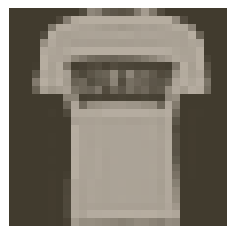

In [8]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

### Building the network
- define network architecture
- each image is 28 x 28 (=784 pixels)
- 10 classes
- '>= 1 hidden layer
- ReLU activations for the layers
- return the log-softmax from forward pass

In [18]:
model = nn.Sequential(nn.Linear(784, 256),
                      nn.ReLU(),
                      nn.Linear(256, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

### Create the network
- define the criterion and the optimizer

In [19]:
# loss function
criterion = nn.NLLLoss()

In [24]:
from torch import optim

optimizer = optim.SGD(model.parameters(), lr=0.1)

### Train the network
- make a forward pass through the network to get the logits
- use the logits to calculate loss
- perform a backward pass through the network with loss.backward() to calculate the gradients
- take a step with the optimizer to update weights

In [25]:
# prepare images for iteration
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

# clear accumulated gradients
optimizer.zero_grad()

# forward pass
logits = model(images)
# calculate loss
loss = criterion(logits, labels)
# backward pass
loss.backward()
# optimizer step to update weights
optimizer.step()

print(loss)

tensor(2.2947, grad_fn=<NllLossBackward>)


In [17]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# test out network

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]

# convert 2D image to 1D vector
img = img.resize_(1, 784)

In [26]:
import torch.nn.functional as F

TypeError: only size-1 arrays can be converted to Python scalars

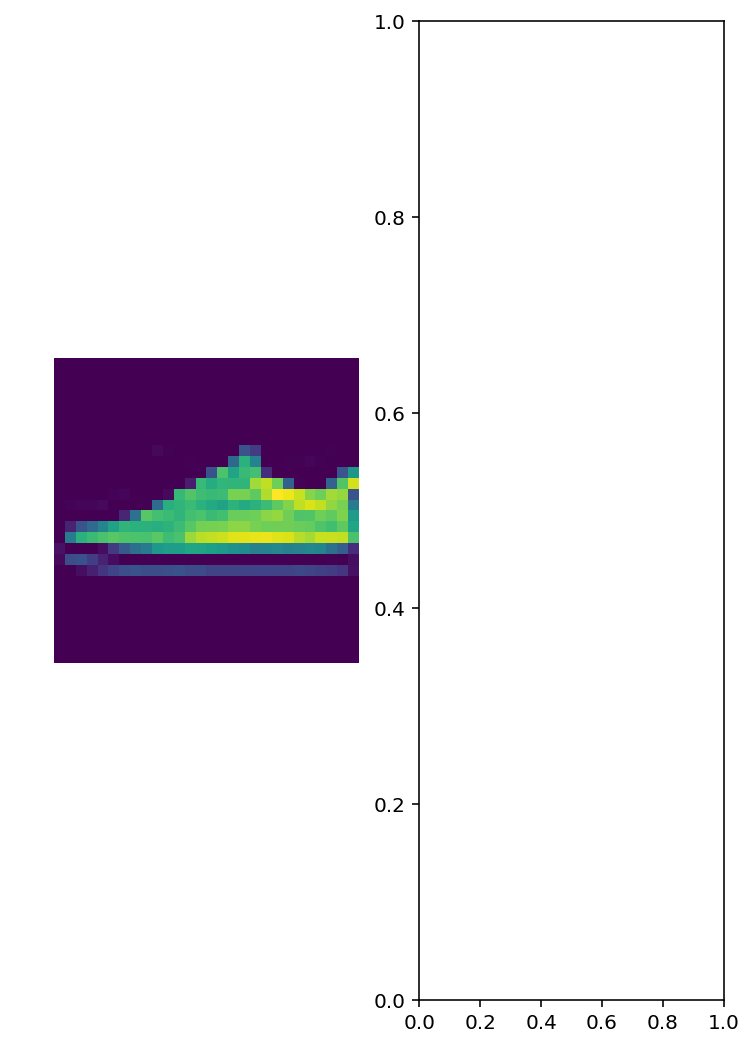

In [28]:
# calculate class probabilities (softmax) for images
ps = F.softmax(logits, dim=1)

# plot image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')